In [ ]:
from google.colab import drive
drive.mount('./gdrive')

%cd './gdrive/MyDrive/AI INSIGHT 2020/W4'

Mounted at ./gdrive
/content/gdrive/MyDrive/AI INSIGHT 2020/W4


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt

# **Linear Regression**

In [ ]:
data_advertising = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1)
n_features = data_advertising.shape[1]-1
data_size = data_advertising.shape[0]

# Shuffle
inds = np.arange(data_size)
np.random.shuffle(inds)
X = data_advertising[:, :n_features]
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X = np.concatenate((X, np.ones((data_size, 1))), axis=1)
X = X[inds]
Y = data_advertising[:, n_features:]
Y = Y[inds]

In [ ]:
def predict(x, theta):
    return tf.matmul(theta, x, transpose_a=True)

In [ ]:
n_epochs = 100
learning_rate = 0.05
m = 32
losses = []
theta = tf.Variable(tf.random.normal((n_features+1, 1)))
mse = tf.keras.losses.MeanAbsoluteError()
for epoch in range(n_epochs):
    for i in range(0, data_size, m):
        if i+m > data_size:
            x = X[i:].T
            y = Y[i:].T
        else:
            x = X[i:i+m].T
            y = Y[i:i+m].T

        batch_size = x.shape[0]

        with tf.GradientTape() as tape:
            z = predict(x, theta)
            loss = mse(y, z)
            print(loss.numpy())
            losses.append(loss)
        grad = tape.gradient(loss, theta)
        theta.assign_sub(learning_rate*grad)

17.809969
16.360355
15.834036
16.927242
17.414238
16.892681
17.385319
17.456081
16.01061
15.492408
16.574198
17.06509
16.543987
17.019926
17.102196
15.660865
15.15078
16.221153
16.715939
16.195293
16.654531
16.748306
15.311118
14.809151
15.868108
16.366787
15.846601
16.28914
16.394417
14.961372
14.467522
15.515062
16.017637
15.497907
15.923748
16.04053
14.611626
14.125893
15.162019
15.668488
15.149214
15.558355
15.686642
14.261879
13.784264
14.808973
15.319336
14.80052
15.192962
15.332752
13.912133
13.442635
14.455929
14.970186
14.451826
14.82757
14.978865
13.562387
13.101007
14.102884
14.621035
14.103134
14.462177
14.624977
13.212641
12.759378
13.74984
14.271884
13.75444
14.096785
14.271089
12.862896
12.41775
13.396795
13.922733
13.405747
13.731392
13.917201
12.513149
12.076122
13.043751
13.573584
13.0570545
13.366
13.5633135
12.1634035
11.734493
12.690706
13.224433
12.708361
13.000608
13.209425
11.813658
11.392864
12.337662
12.875283
12.359669
12.635216
12.855537
11.463912
11.051236


Text(0, 0.5, 'Loss')

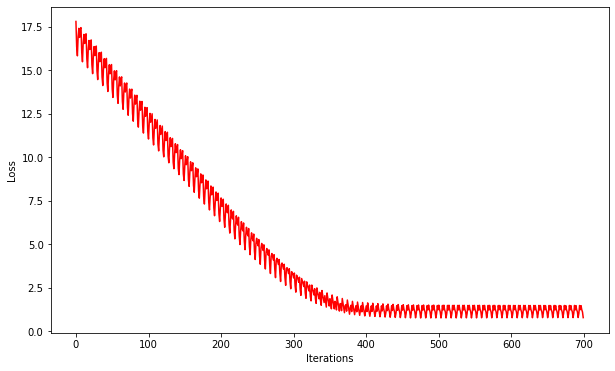

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(losses, 'r')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# **Logistic Regression**

In [ ]:
data_iris = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
n_features = data_iris.shape[1]-1
data_size = data_iris.shape[0]

# Shuffle
inds = np.arange(data_size)
np.random.shuffle(inds)

X = data_iris[:, :n_features]
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X = np.concatenate((X, np.ones((data_size, 1))), axis=1)
X = X[inds]
Y = data_iris[:, n_features:]
Y = Y[inds]

In [ ]:
def predict(x, theta):
    return tf.math.sigmoid(tf.matmul(theta, x, transpose_a=True))

In [ ]:
n_epochs = 100
learning_rate = 0.05
m = 32
losses = []
accuracy = []
n_classes = len(set(np.squeeze(Y).tolist()))
theta = tf.Variable(tf.random.normal((n_features+1, n_classes)))
scce = tf.keras.losses.SparseCategoricalCrossentropy(reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
for epoch in range(n_epochs):
    for i in range(0, data_size, m):
        if i+m > data_size:
            x = X[i:].T
            y = Y[i:]
        else:
            x = X[i:i+m].T
            y = Y[i:i+m]
        
        with tf.GradientTape() as tape:
            y_hat = predict(x, theta)
            loss = scce(y, tf.linalg.matrix_transpose(y_hat))
            print('Loss: ', loss.numpy())
            losses.append(loss)

        grad = tape.gradient(loss, theta)
        theta.assign_sub(learning_rate*grad)
        
        y_pred = predict(X.T, theta)
        y_pred = tf.argmax(y_pred, axis=0)
        acc = np.mean(y_pred==Y.T, axis=1)
        accuracy.append(acc)
        print('Accuracy: ', acc)

Loss:  1.4404724
Accuracy:  [0.38]
Loss:  1.0949569
Accuracy:  [0.38]
Loss:  0.95786154
Accuracy:  [0.38]
Loss:  1.1572049
Accuracy:  [0.38]
Loss:  1.2105126
Accuracy:  [0.39333333]
Loss:  1.3431032
Accuracy:  [0.39333333]
Loss:  1.0340528
Accuracy:  [0.39333333]
Loss:  0.91073334
Accuracy:  [0.39333333]
Loss:  1.089066
Accuracy:  [0.4]
Loss:  1.1285223
Accuracy:  [0.40666667]
Loss:  1.2595848
Accuracy:  [0.41333333]
Loss:  0.9830897
Accuracy:  [0.42666667]
Loss:  0.8713219
Accuracy:  [0.43333333]
Loss:  1.0308688
Accuracy:  [0.44]
Loss:  1.0592786
Accuracy:  [0.45333333]
Loss:  1.1879432
Accuracy:  [0.47333333]
Loss:  0.9398122
Accuracy:  [0.47333333]
Loss:  0.83790326
Accuracy:  [0.48]
Loss:  0.9810333
Accuracy:  [0.48666667]
Loss:  1.0006561
Accuracy:  [0.5]
Loss:  1.1262912
Accuracy:  [0.5]
Loss:  0.90252906
Accuracy:  [0.5]
Loss:  0.8091495
Accuracy:  [0.50666667]
Loss:  0.9381331
Accuracy:  [0.51333333]
Loss:  0.950759
Accuracy:  [0.52]
Loss:  1.0729513
Accuracy:  [0.52666667]
Lo

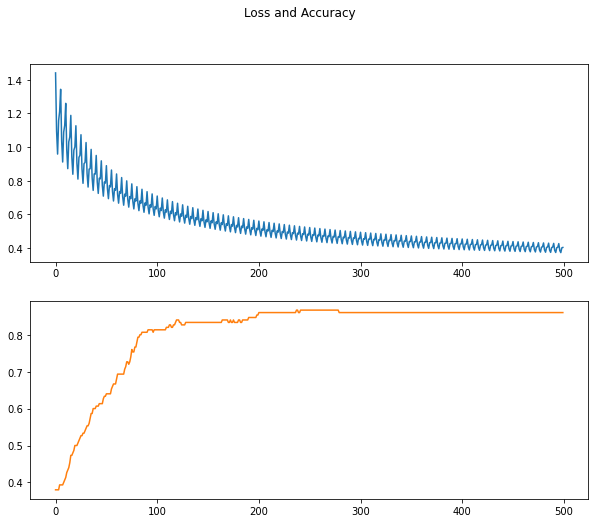

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(8)
fig.set_figwidth(10)
fig.suptitle('Loss and Accuracy')
ax1.plot(losses, 'tab:blue')
ax2.plot(accuracy, 'tab:orange')